# YOUR PROJECT TITLE

Imports and set magics:

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import datetime

import datetime

import pandas_datareader # install with `pip install pandas-datareader`

In [172]:
# Reading SMIT4 which containst information regarding daily infection for all 98 municipalities
# Import data
SMIT4 = 'SMIT4.xlsx'

# Read data
pd.read_excel(SMIT4).head(10)

# Cleaning SMIT4
# Remove the first column and first two rows which contain no information
SMIT4 = pd.read_excel(SMIT4, skiprows=2)
SMIT4.drop('Unnamed: 0', axis=1, inplace=True)

# Rename new column 1
SMIT4.rename(columns = {'Unnamed: 1':'Municipality'}, inplace=True)

# Drop the last two column which contain no information
SMIT4 = SMIT4.drop([100, 101])

# Dropping the row Christiansø since it is not actually a municipality 
SMIT4 = SMIT4.loc[SMIT4.Municipality.str.contains('Christiansø') == False] # keep everything else

# Dropping the first 104 columns, as data is not present for all municipalities
SMIT4.reset_index(inplace = True, drop = True) # Drop old index too
SMIT4_sorted = SMIT4.drop(SMIT4.iloc[:, 1:104], axis=1, inplace=False)


SMIT4_sorted.head(99)



,Municipality,2020M09D07,2020M09D08,2020M09D09,2020M09D10,2020M09D11,2020M09D12,2020M09D13,2020M09D14,2020M09D15,...,2021M06D20,2021M06D21,2021M06D22,2021M06D23,2021M06D24,2021M06D25,2021M06D26,2021M06D27,2021M06D28,2021M06D29
0,All Denmark,311.0,315.0,320.0,325.0,330.0,336.0,342.0,348.0,353.0,...,5009.0,5011.0,5014.0,5018.0,5021.0,5025.0,5028.0,5031.0,5034.0,5038.0
1,Copenhagen,544.0,556.0,566.0,578.0,587.0,599.0,611.0,625.0,637.0,...,8326.0,8331.0,8338.0,8350.0,8356.0,8367.0,8375.0,8383.0,8391.0,8406.0
2,Frederiksberg,552.0,557.0,560.0,577.0,591.0,604.0,620.0,634.0,645.0,...,7509.0,7515.0,7520.0,7533.0,7540.0,7553.0,7562.0,7577.0,7583.0,7593.0
3,Dragør,221.0,221.0,228.0,228.0,228.0,235.0,235.0,235.0,235.0,...,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0
4,Tårnby,354.0,356.0,361.0,365.0,368.0,377.0,379.0,386.0,388.0,...,7639.0,7641.0,7644.0,7646.0,7648.0,7648.0,7651.0,7653.0,7653.0,7653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,3042.0,3042.0,3062.0,3062.0,3062.0,3062.0,3062.0,3062.0,3067.0,3067.0
95,Rebild,80.0,80.0,80.0,80.0,80.0,83.0,86.0,93.0,103.0,...,3191.0,3191.0,3198.0,3198.0,3198.0,3201.0,3201.0,3201.0,3201.0,3201.0
96,Thisted,117.0,117.0,136.0,143.0,145.0,145.0,147.0,147.0,150.0,...,3137.0,3137.0,3137.0,3137.0,3141.0,3141.0,3141.0,3141.0,3141.0,3141.0
97,Vesthimmerlands,221.0,221.0,221.0,221.0,226.0,226.0,229.0,229.0,229.0,...,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2608.0,2608.0


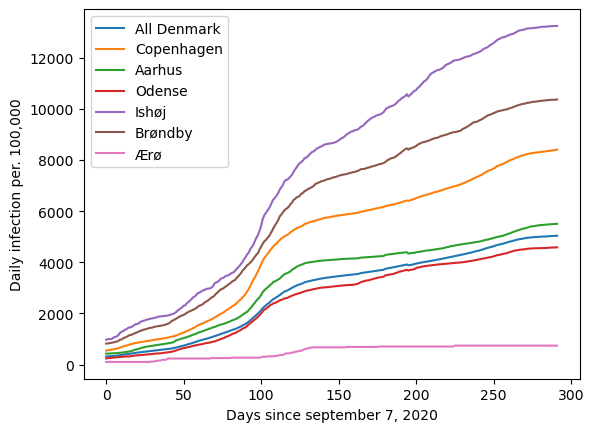

In [173]:
# Creating time series plot

# Transposing SMIT4 for convenience 
SMIT4T = SMIT4_sorted.T

column_names = SMIT4T.iloc[0]

# Set the column names to row number 1
SMIT4T.set_axis(column_names, axis=1, inplace=True)

SMIT4T.drop(SMIT4T.index[0], inplace=True)

# Create a new index column
SMIT4T['Date'] = SMIT4T.index

SMIT4T.reset_index(inplace = True, drop = True) # Drop old index too

# Plotting selected municipalities
plot_municipalities = ['All Denmark', 'Copenhagen', 'Aarhus', 'Odense', 'Ishøj', 'Brøndby', 'Ærø']

# a. create the figure
fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1)

for x in plot_municipalities:
    ax.plot(SMIT4T.loc[:, [x]], label=x)

ax.set_xlabel('Days since september 7, 2020')
ax.set_ylabel('Daily infection per. 100,000')
ax.legend(loc='upper left'); # Activate legend (uses the labels in ax.plot())

# For some reasons, Python can't do dateformats on x-axis








In [174]:
# Reading BEV107 which contain information regarding the poluation size of all Danish municipalities ultimo 2021.
BEV107 = 'BEV107.xlsx'

# Read data
pd.read_excel(BEV107).head(10)

# Cleaning Bev107
# Remove the first column and first two rows which contain no information
BEV107 = pd.read_excel(BEV107, skiprows=2)
BEV107.drop('Unnamed: 0', axis=1, inplace=True)

# Rename new column 1
BEV107.rename(columns = {'Unnamed: 1': 'Municipality', '2022': 'pop2022'}, inplace=True)


# Drop the last two column which contain no information
BEV107 = BEV107.drop([99, 100])

# Dropping the row Christiansø since it is not actually a municipality 
BEV107 = BEV107.loc[BEV107.Municipality.str.contains('Christiansø') == False] # keep everything else

# Resetting index
BEV107.reset_index(inplace = True, drop = True) # Drop old index too

# calculate column sums and add as new row
new_row = BEV107.iloc[:, 1:].sum(axis=0)
new_row['Municipality'] = 'All Denmark'
BEV107 = BEV107.append(new_row, ignore_index=True)

last_index = BEV107.index[-1]
BEV107 = BEV107.loc[[last_index] + list(range(last_index)) + list(range(last_index+1, len(BEV107)))].reset_index(drop=True)

BEV107.head(99)

/var/folders/2d/ksv407rj30z_gz_g2npsz8br0000gn/T/ipykernel_40803/2368396444.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  BEV107 = BEV107.append(new_row, ignore_index=True)


,Municipality,pop2022
0,All Denmark,5873327.0
1,Copenhagen,644431.0
2,Frederiksberg,103608.0
3,Dragør,14640.0
4,Tårnby,42723.0
...,...,...
94,Morsø,20068.0
95,Rebild,30646.0
96,Thisted,43089.0
97,Vesthimmerlands,36326.0


In [175]:
# Calculating daily mean for each municipality
SMIT4_sorted['daily_mean'] = SMIT4_sorted.mean(axis=1)
SMIT4_sorted.head(99)

/var/folders/2d/ksv407rj30z_gz_g2npsz8br0000gn/T/ipykernel_40803/89609779.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SMIT4_sorted['daily_mean'] = SMIT4_sorted.mean(axis=1)


,Municipality,2020M09D07,2020M09D08,2020M09D09,2020M09D10,2020M09D11,2020M09D12,2020M09D13,2020M09D14,2020M09D15,...,2021M06D21,2021M06D22,2021M06D23,2021M06D24,2021M06D25,2021M06D26,2021M06D27,2021M06D28,2021M06D29,daily_mean
0,All Denmark,311.0,315.0,320.0,325.0,330.0,336.0,342.0,348.0,353.0,...,5011.0,5014.0,5018.0,5021.0,5025.0,5028.0,5031.0,5034.0,5038.0,2877.136986
1,Copenhagen,544.0,556.0,566.0,578.0,587.0,599.0,611.0,625.0,637.0,...,8331.0,8338.0,8350.0,8356.0,8367.0,8375.0,8383.0,8391.0,8406.0,4830.438356
2,Frederiksberg,552.0,557.0,560.0,577.0,591.0,604.0,620.0,634.0,645.0,...,7515.0,7520.0,7533.0,7540.0,7553.0,7562.0,7577.0,7583.0,7593.0,4397.886986
3,Dragør,221.0,221.0,228.0,228.0,228.0,235.0,235.0,235.0,235.0,...,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,3521.178082
4,Tårnby,354.0,356.0,361.0,365.0,368.0,377.0,379.0,386.0,388.0,...,7641.0,7644.0,7646.0,7648.0,7648.0,7651.0,7653.0,7653.0,7653.0,4494.547945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,3042.0,3062.0,3062.0,3062.0,3062.0,3062.0,3062.0,3067.0,3067.0,1806.267123
95,Rebild,80.0,80.0,80.0,80.0,80.0,83.0,86.0,93.0,103.0,...,3191.0,3198.0,3198.0,3198.0,3201.0,3201.0,3201.0,3201.0,3201.0,1680.989726
96,Thisted,117.0,117.0,136.0,143.0,145.0,145.0,147.0,147.0,150.0,...,3137.0,3137.0,3137.0,3141.0,3141.0,3141.0,3141.0,3141.0,3141.0,1728.585616
97,Vesthimmerlands,221.0,221.0,221.0,221.0,226.0,226.0,229.0,229.0,229.0,...,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2608.0,2608.0,1446.982877


In [177]:
# Calculating descriptive statistics of daily means
SMIT4_sorted.loc[:, ['daily_mean']].describe()



,daily_mean
count,99.000000
mean,2605.431991
std,1390.720880
min,503.551370
25%,1700.818493
50%,2079.434932
75%,3330.226027
max,7726.229452


In [151]:
# merge SMIT4_sorted and BEV107 using an inner merge
merge = pd.merge(SMIT4_sorted,BEV107,how='inner',on=['Municipality'])
print(f'Number of municipalities = {len(merge.Municipality.unique())}')
merge.head(100)

Number of municipalities = 99


,Municipality,2020M09D07,2020M09D08,2020M09D09,2020M09D10,2020M09D11,2020M09D12,2020M09D13,2020M09D14,2020M09D15,...,2021M06D22,2021M06D23,2021M06D24,2021M06D25,2021M06D26,2021M06D27,2021M06D28,2021M06D29,daily_mean,pop2022
0,All Denmark,311.0,315.0,320.0,325.0,330.0,336.0,342.0,348.0,353.0,...,5014.0,5018.0,5021.0,5025.0,5028.0,5031.0,5034.0,5038.0,2877.136986,5873327.0
1,Copenhagen,544.0,556.0,566.0,578.0,587.0,599.0,611.0,625.0,637.0,...,8338.0,8350.0,8356.0,8367.0,8375.0,8383.0,8391.0,8406.0,4830.438356,644431.0
2,Frederiksberg,552.0,557.0,560.0,577.0,591.0,604.0,620.0,634.0,645.0,...,7520.0,7533.0,7540.0,7553.0,7562.0,7577.0,7583.0,7593.0,4397.886986,103608.0
3,Dragør,221.0,221.0,228.0,228.0,228.0,235.0,235.0,235.0,235.0,...,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,6327.0,3521.178082,14640.0
4,Tårnby,354.0,356.0,361.0,365.0,368.0,377.0,379.0,386.0,388.0,...,7644.0,7646.0,7648.0,7648.0,7651.0,7653.0,7653.0,7653.0,4494.547945,42723.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,3062.0,3062.0,3062.0,3062.0,3062.0,3062.0,3067.0,3067.0,1806.267123,20068.0
95,Rebild,80.0,80.0,80.0,80.0,80.0,83.0,86.0,93.0,103.0,...,3198.0,3198.0,3198.0,3201.0,3201.0,3201.0,3201.0,3201.0,1680.989726,30646.0
96,Thisted,117.0,117.0,136.0,143.0,145.0,145.0,147.0,147.0,150.0,...,3137.0,3137.0,3141.0,3141.0,3141.0,3141.0,3141.0,3141.0,1728.585616,43089.0
97,Vesthimmerlands,221.0,221.0,221.0,221.0,226.0,226.0,229.0,229.0,229.0,...,2606.0,2606.0,2606.0,2606.0,2606.0,2606.0,2608.0,2608.0,1446.982877,36326.0


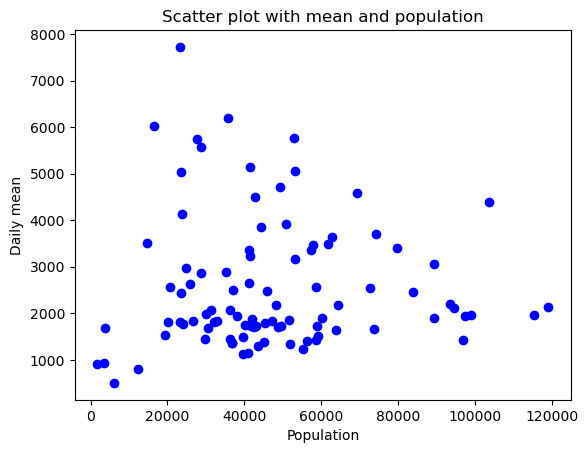

In [152]:
# Creating scatter plot excluding the big cities

# list of municipality names to exclude
exclude_municipalities = ['All Denmark', 'Copenhagen', 'Aalborg', 'Aarhus', 'Odense']

# filter rows to exclude specific municipalities
merge_scatter = merge.loc[~merge['Municipality'].isin(exclude_municipalities)]


plt.scatter(merge_scatter['pop2022'], merge_scatter['daily_mean'], color='blue')

# set plot title and axes labels
plt.title('Scatter plot with mean and population')
plt.xlabel('Population')
plt.ylabel('Daily infected mean')
plt.show()

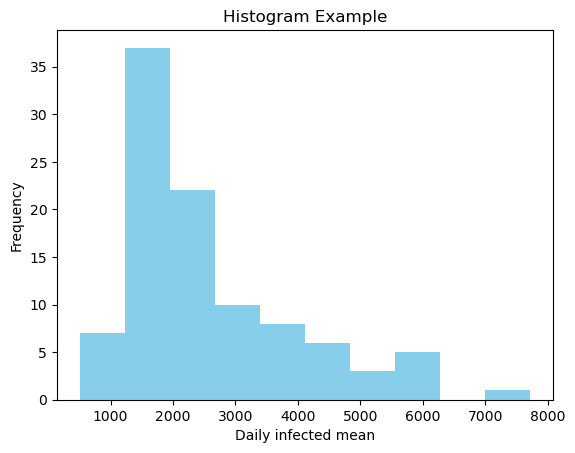

In [158]:
plt.hist(merge.loc[:, ['daily_mean']], bins=10, color='skyblue', alpha=1)
plt.xlabel('Daily infected mean')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.show()